In [1]:
from utils import * 
from algorithms import *
from agents import *

In [2]:
numRounds, numPeriods, numSteps = 1, 10000, 10
numBuyers, numSellers, numTokens = 4, 4, 4
gameTypes, seed = '1111', 42
disclosure = []
depth = 0
gameData = [gameTypes, numBuyers, numSellers, numTokens, numRounds, numPeriods, numSteps, seed]
verbose = 1
numStates = 2
buyers = [Reinforcer(gameData, disclosure, index=0, buyer=1, reinforcer=1, numStates = 2, algo='PPO1'),
          #ZeroIntelligence(gameData, disclosure, index=0, buyer=1, reinforcer=0),
          ZeroIntelligence(gameData, disclosure, index=0, buyer=1, reinforcer=0),
          ZeroIntelligence(gameData, disclosure, index=0, buyer=1, reinforcer=0),
          ZeroIntelligence(gameData, disclosure, index=0, buyer=1, reinforcer=0)]
sellers = [ZeroIntelligence(gameData, disclosure, index=0, buyer=0, reinforcer=0),
           ZeroIntelligence(gameData, disclosure, index=0, buyer=0, reinforcer=0),
           ZeroIntelligence(gameData, disclosure, index=0, buyer=0, reinforcer=0),
           ZeroIntelligence(gameData, disclosure, index=0, buyer=0, reinforcer=0)]
log = Log(gameData, disclosure)
rnd = 0

In [3]:
for rnd in range(numRounds):
    startRounds(gameData, log, buyers, sellers, rnd)
    #print(log.roundData.buyerValues.item())
    score = 0.0
    for period in range(numPeriods):
        startPeriods(buyers, sellers)
        for step in range(numSteps):
            # start
            startSteps(buyers, sellers)

            # set state
            buyers[0].state = [buyers[0].periodSteps, buyers[0].periodTrades]

            # trade
            bids, asks = collectOffers(buyers, sellers)
            currentAsk, currentAskIdx, currentBid, currentBidIdx = bestOffers(bids, asks)
            price, buy, sell = trade(buyers, sellers, currentAsk, currentAskIdx, currentBid, currentBidIdx)
            bprofit, sprofit = 0, 0
            if price > 0:
                buyers[currentBidIdx].transact(price)
                sellers[currentAskIdx].transact(price)
                bprofit = buyers[currentBidIdx].stepProfits
                sprofit = sellers[currentAskIdx].stepProfits
            if currentBidIdx == 0:
                score += bprofit
                
            # log and end step
            log.addStep([rnd, period, step, bids, asks, currentBid, currentBidIdx, currentAsk, currentAskIdx, buy, sell, price, price>0, bprofit, sprofit])
            observe(buyers, sellers, log.disclose())
            endSteps(buyers, sellers) # updates period counters

            # new state and done
            buyers[0].newState = [step+1, buyers[0].periodTrades]
            if buyers[0].periodSteps == numSteps - 1:
                buyers[0].done = True
            else:
                buyers[0].done = False

            # load data and train
            agentsObserve(buyers, sellers)
            agentsTrain(buyers, sellers)

        endPeriods(buyers, sellers)
        if period%100==0:
            print(score/100)
            score = 0.0
    endRounds(buyers, sellers)

0.0
40.70033939494203
48.825225702964644
47.220977503256876
51.102053659065305
54.96267534589326
54.206385200393015
58.69239886251577
57.39415467179003
58.48841004253391
55.81740933644542
56.50473204097255
57.12481416690016
58.332647383953436
54.84718945941393
57.92419751705649
54.912875566652275
56.683777046992134
55.85407522676828
56.72097437111211
58.05264351447921
54.22721089387924
57.76498834330815
58.596285820782334
57.361281108961556
58.23642473803381
58.01867390722057
59.02803578518742
57.50186836989318
57.95461445650078
55.990742993557205
58.59453534655664
56.877208506539446
57.63067847779671
57.09155919145291
56.53006321311984
55.93864298438406
56.483267172892035
56.61943557352836
55.382034178735275
54.10092345926319
54.649487277147315
52.617042007364255
53.571430526140546
53.251460708412516
56.07108945430101
53.26856791903147
55.36767535515774
55.93537426913783
56.12358676990382
55.32435061446974
54.27068015422105
55.81851852450336
54.79352953400381
55.11056343593496
54.0511

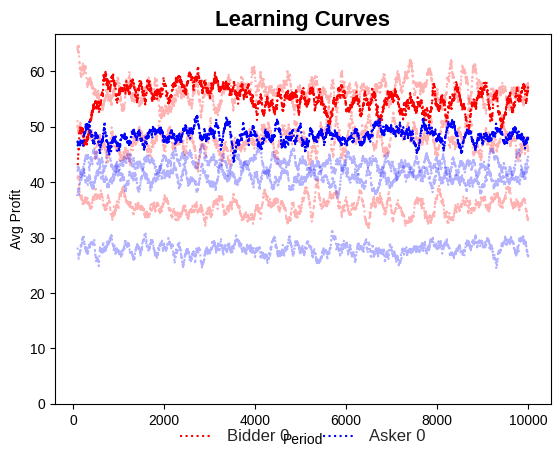

In [4]:
log.graphLearning(rolling_window = 100, trackBuyersIdx=[0], trackSellersIdx=[0])

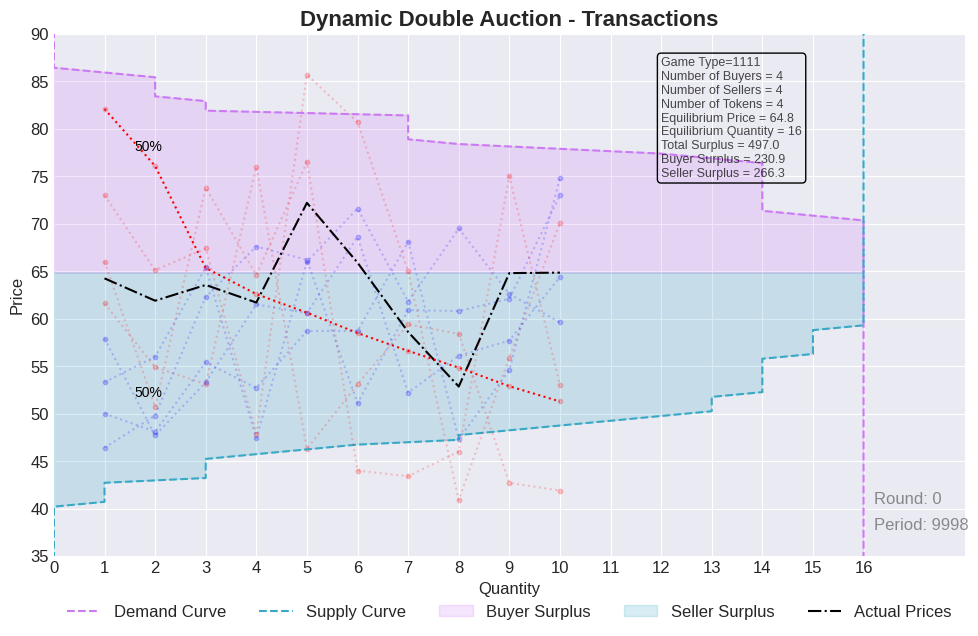

In [5]:
log.graphSales(0, period-1, trackBuyersIdx=[0], trackSellersIdx=[])

In [6]:
log.roundData.buyerValues.item()

array([[85.82202637, 81.73001813, 81.63077519, 77.98802756],
       [86.00286066, 81.75851481, 77.79014457, 77.22312836],
       [83.24607464, 78.75300079, 77.92916939, 77.73215368],
       [81.78455651, 76.72373723, 71.09604113, 70.44124563]])

In [7]:
log.stepData.tail(15)

,rnd,period,step,bids,asks,currentBid,currentBidIdx,currentAsk,currentAskIdx,buy,sell,price,sale,bprofit,sprofit
99985,0,9998,5,"[58.48772715777159, 80.7, 44.0, 53.1]","[68.6, 58.7, 51.1, 71.6]",80.700000,1,51.1,2,True,True,65.900000,True,15.858515,19.211633
99986,0,9998,6,"[56.60495702177286, 65.0, 43.4, 59.4]","[52.2, 68.1, 60.9, 61.8]",65.000000,1,52.2,0,True,True,58.600000,True,19.190145,12.716825
99987,0,9998,7,"[54.83930788934231, 40.9, 46.0, 58.4]","[56.1, 47.3, 60.8, 69.5]",58.400000,3,47.3,1,True,True,52.850000,True,23.873737,5.767183
99988,0,9998,8,"[52.884917706251144, 55.9, 75.0, 42.7]","[57.7, 54.6, 62.1, 62.6]",75.000000,2,54.6,1,True,True,64.800000,True,13.953001,16.537677
99989,0,9998,9,"[51.278637275099754, 70.1, 53.0, 41.9]","[64.4, 74.8, 73.0, 59.6]",70.100000,1,59.6,3,True,True,64.850000,True,12.373128,16.917866
99990,0,9999,0,"[82.0670135319233, 71.2, 74.1, 51.0]","[50.4, 60.1, 54.3, 50.0]",82.067014,0,50.0,3,True,True,66.033507,True,19.788520,18.960827
99991,0,9999,1,"[76.20031967759132, 77.8, 64.6, 77.8]","[58.0, 50.8, 52.1, 67.6]",77.800000,1,50.8,1,True,True,64.300000,True,21.702861,23.684515
99992,0,9999,2,"[75.08225835859776, 68.7, 70.4, 79.6]","[47.7, 51.6, 58.1, 64.4]",79.600000,3,47.7,0,True,True,63.650000,True,18.134557,20.803759
99993,0,9999,3,"[72.6397892087698, 67.0, 82.6, 66.9]","[63.5, 70.2, 61.2, 70.2]",82.600000,2,61.2,2,True,True,71.900000,True,11.346075,29.098802
99994,0,9999,4,"[70.17575241625309, 58.6, 62.7, 47.3]","[46.4, 61.3, 59.4, 48.5]",70.175752,0,46.4,0,True,True,58.287876,True,23.442142,12.734781


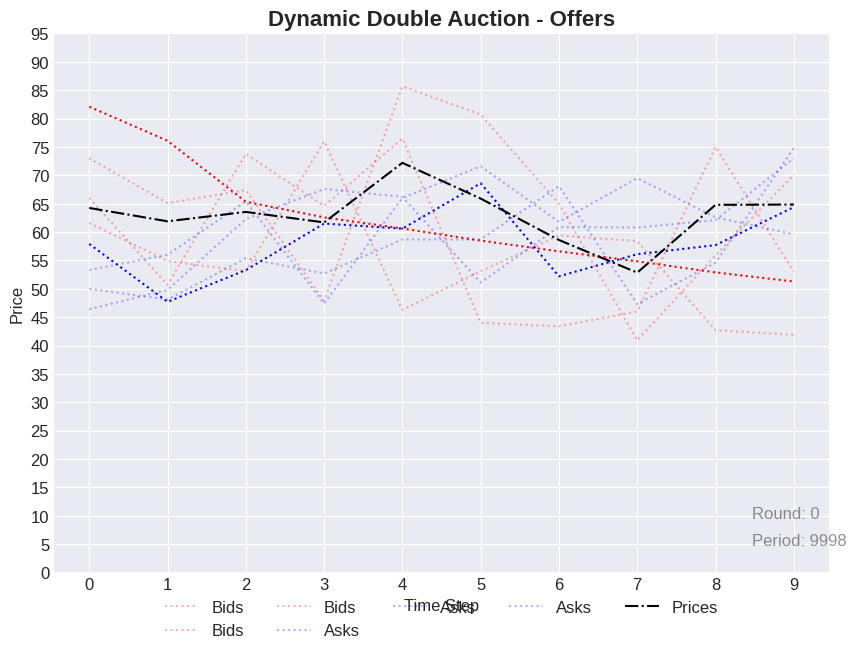

In [8]:
log.graphOffers(0, period-1, trackBuyersIdx=[0], trackSellersIdx=[0])

In [9]:
log.graphTraining(maxNumPeriods=period-1, skip = int((period-1)/50), trackBuyersIdx = [0])